In [1]:
%pip install -Uqq fastai

Note: you may need to restart the kernel to use updated packages.


In [2]:
from fastai.tabular.all import *

In [16]:
df_train = pd.read_csv('titanic/train.csv', index_col = 'PassengerId')
df_train.drop('Name', axis = 1, inplace = True)
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,female,35.0,1,0,113803,53.1000,C123,S
5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
df_train['Survived'].sum() / len(df_train['Survived'])

0.3838383838383838

In [18]:
cont_names, cat_names = cont_cat_split(df_train, dep_var = 'Survived')

In [22]:
to = TabularPandas(df_train,
                  procs = [Categorify, FillMissing, Normalize],
                  y_block = CategoryBlock(),
                  cont_names = cont_names,
                  y_names = 'Survived')

dls = to.dataloaders(bs = 80)
dls.show_batch()

,Age_na,Age,Fare,Survived
0,False,18.000000,7.775000,0
1,False,55.499999,8.049999,0
2,False,34.000000,10.500001,1
3,False,42.000000,12.999999,0
4,False,35.000000,26.549999,1
5,False,25.000000,7.050000,0
6,False,28.000000,7.895800,0
7,False,22.000000,10.516701,0
8,False,37.000000,52.554199,1
9,True,28.000000,22.358299,1


/root/mambaforge/lib/python3.9/site-packages/fastprogress/fastprogress.py:74: UserWarning: Your generator is empty.
  warn("Your generator is empty.")
/root/mambaforge/lib/python3.9/site-packages/fastprogress/fastprogress.py:74: UserWarning: Your generator is empty.
  warn("Your generator is empty.")
/root/mambaforge/lib/python3.9/site-packages/fastprogress/fastprogress.py:74: UserWarning: Your generator is empty.
  warn("Your generator is empty.")
/root/mambaforge/lib/python3.9/site-packages/fastprogress/fastprogress.py:74: UserWarning: Your generator is empty.
  warn("Your generator is empty.")
/root/mambaforge/lib/python3.9/site-packages/fastprogress/fastprogress.py:74: UserWarning: Your generator is empty.
  warn("Your generator is empty.")
/root/mambaforge/lib/python3.9/site-packages/fastprogress/fastprogress.py:74: UserWarning: Your generator is empty.
  warn("Your generator is empty.")
/root/mambaforge/lib/python3.9/site-packages/fastprogress/fastprogress.py:74: UserWarning: You

SuggestedLRs(valley=0.0008317637839354575)

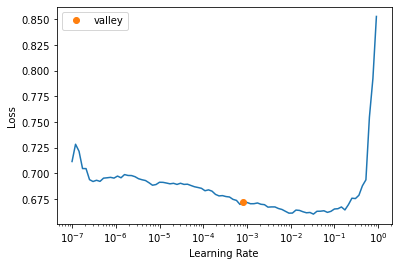

In [23]:
learn = tabular_learner(dls = dls,
                       metrics = accuracy)
learn.lr_find()

In [25]:
learn.fit_one_cycle(20, lr_max = 5e-2,
                    cbs = [EarlyStoppingCallback(monitor = 'accuracy',
                                                patience = 10),
                          ReduceLROnPlateau(monitor = 'valid_loss',
                                           patience = 5),
                          SaveModelCallback(monitor = 'accuracy')
                          ])

epoch,train_loss,valid_loss,accuracy,time


/root/mambaforge/lib/python3.9/site-packages/fastprogress/fastprogress.py:74: UserWarning: Your generator is empty.
  warn("Your generator is empty.")


TypeError: Exception occured in `SaveModelCallback` when calling event `after_epoch`:
	unsupported operand type(s) for -: 'NoneType' and 'float'